In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os

video_features_path = '/content/drive/MyDrive/CS670_Project/model/video_features.npy'
video_labels_path='/content/drive/MyDrive/CS670_Project/model/video_labels.npy'
X = np.load(video_features_path)
y=np.load(video_labels_path)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Flatten the image data for PCA
X_flatten = X.reshape(X.shape[0], -1)

# Initialize PCA with the desired number of components
num_components = 2  # Adjust this as needed
pca = PCA(n_components=num_components)

# Fit PCA on the training data
pca.fit(X_flatten)

# Transform the training and testing data using the trained PCA
X_train_pca = pca.transform(X_flatten)

(133136, 2)


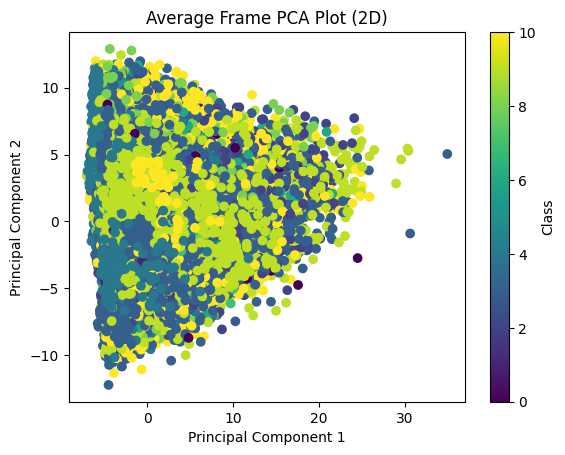

In [ ]:

print(X_train_pca.shape)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Average Frame PCA Plot (2D)')
plt.colorbar(label='Class')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

from sklearn.model_selection import train_test_split

class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out)  # Take the last time step output
        return torch.softmax(output, dim=1)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Prepare data loaders
X_train_tensor = torch.tensor(X_train)  # Features tensor
y_train_tensor = torch.tensor(y_train)
train_dataset = TensorDataset(X_train_tensor,y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Define model, loss function, and optimizer
model = LSTMClassifier(input_dim=2048, hidden_dim=128, num_layers=1, output_dim=11)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Evaluation
X_test_tensor = torch.tensor(X_test)  # Features tensor
y_test_tensor = torch.tensor(y_test)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

all_predictions = []
all_probabilities = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        probabilities = torch.softmax(outputs, dim=1)
        all_predictions.extend(predicted.tolist())
        all_probabilities.extend(probabilities.tolist())

all_predictions = torch.tensor(all_predictions)
all_probabilities = torch.tensor(all_probabilities)

print("Predicted labels for test sequences:", all_predictions)
print("Class probabilities for test sequences:", all_probabilities)

torch.save(model.state_dict(), '/content/drive/MyDrive/CS670_Project/lstm_model.pth')


Predicted labels for test sequences: tensor([ 3,  3, 10,  ..., 10,  3,  3])
Class probabilities for test sequences: tensor([[0.0786, 0.0786, 0.0786,  ..., 0.0786, 0.0786, 0.0786],
        [0.0786, 0.0786, 0.0786,  ..., 0.0786, 0.0787, 0.0787],
        [0.0786, 0.0786, 0.0786,  ..., 0.0786, 0.0786, 0.2137],
        ...,
        [0.0794, 0.0794, 0.0794,  ..., 0.0794, 0.0864, 0.1986],
        [0.0813, 0.0813, 0.0813,  ..., 0.0813, 0.0813, 0.1269],
        [0.0786, 0.0786, 0.0786,  ..., 0.0786, 0.0786, 0.0786]])


In [ ]:
model1 = LSTMClassifier(input_dim=2048, hidden_dim=128, num_layers=1, output_dim=11)

# Load the saved state dictionary into the model
model1.load_state_dict(torch.load('/content/drive/MyDrive/CS670_Project/lstm_model_pca.pth'))

# Ensure the model is in evaluation mode
model1.eval()
torch.save(model1, '/content/drive/MyDrive/CS670_Project/lstm_model_fullpca.pth')



In [ ]:
torch.save(model1, '/content/drive/MyDrive/CS670_Project/lstm_model_full.pth')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test_tensor = torch.tensor(X_test)  # Features tensor
y_test_tensor = torch.tensor(y_test)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

all_predictions = []
all_probabilities = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model1(inputs)
        _, predicted = torch.max(outputs, 1)
        probabilities = torch.softmax(outputs, dim=1)
        all_predictions.extend(predicted.tolist())
        all_probabilities.extend(probabilities.tolist())

all_predictions = torch.tensor(all_predictions)
all_probabilities = torch.tensor(all_probabilities)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, all_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7695183591628723



**LSTM 2 layers**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

from sklearn.model_selection import train_test_split

class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMClassifier, self).__init__()
        self.lstm1 = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_dim, hidden_dim, num_layers, batch_first=True)  # Add second LSTM layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm1(x)
        print(lstm_out.shape)
        lstm_out, _ = self.lstm2(lstm_out)  # Pass output of first LSTM to second LSTM
        print(lstm_out.shape)
        output = self.fc(lstm_out)   # Take the last time step output
        print(output.shape)
        return torch.softmax(output, dim=1)


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Prepare data loaders
X_train_tensor = torch.tensor(X_train)  # Features tensor
y_train_tensor = torch.tensor(y_train)
train_dataset = TensorDataset(X_train_tensor,y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Define model, loss function, and optimizer
model = LSTMClassifier(input_dim=2048, hidden_dim=128, num_layers=1, output_dim=11)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Evaluation
X_test_tensor = torch.tensor(X_test)  # Features tensor
y_test_tensor = torch.tensor(y_test)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

all_predictions = []
all_probabilities = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        probabilities = torch.softmax(outputs, dim=1)
        all_predictions.extend(predicted.tolist())
        all_probabilities.extend(probabilities.tolist())

all_predictions = torch.tensor(all_predictions)
all_probabilities = torch.tensor(all_probabilities)

print("Predicted labels for test sequences:", all_predictions)
print("Class probabilities for test sequences:", all_probabilities)

torch.save(model.state_dict(), '/content/drive/MyDrive/CS670_Project/lstm2_model.pth')


Streaming output truncated to the last 5000 lines.
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 11])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 11])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 11])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 11])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 11])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 11])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 11])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 11])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 11])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 11])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 11])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 11])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 11])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 11])
torch.Size([16, 128])
torch.Size([16, 1

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, all_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7227745519862985


**PCA**

In [ ]:
model1 = LSTMClassifier(input_dim=2048, hidden_dim=128, num_layers=1, output_dim=11)

# Load the saved state dictionary into the model
model1.load_state_dict(torch.load('/content/drive/MyDrive/CS670_Project/lstm_model_pca.pth'))

# Ensure the model is in evaluation mode
model1.eval()

LSTMClassifier(
  (lstm): LSTM(2048, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=11, bias=True)
)

In [ ]:
model1

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import joblib

# Flatten the image data for PCA
X_flatten = X.reshape(X.shape[0], -1)

# Initialize PCA with the desired number of components
num_components = 1000  # Adjust this as needed
pca = PCA(n_components=num_components)

# Fit PCA on the training data
pca.fit(X_flatten)

# Transform the training and testing data using the trained PCA
X_pca = pca.transform(X_flatten)
joblib.dump(pca, '/content/drive/MyDrive/CS670_Project/pca_model.pkl')


['/content/drive/MyDrive/CS670_Project/pca_model.pkl']

In [ ]:
np.save("/content/drive/MyDrive/CS670_Project/video_feats_pca",X_pca)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

from sklearn.model_selection import train_test_split
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
# Prepare data loaders
X_train_tensor = torch.tensor(X_train)  # Features tensor
y_train_tensor = torch.tensor(y_train)
train_dataset = TensorDataset(X_train_tensor,y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Define model, loss function, and optimizer
model = LSTMClassifier(input_dim=2048, hidden_dim=128, num_layers=1, output_dim=11)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == targets).sum().item()
        total_samples += targets.size(0)

    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct_predictions / total_samples

    # Print training statistics for the epoch
    print(f'Epoch [{epoch+1}/{20}], Loss: {loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

# Evaluation
X_test_tensor = torch.tensor(X_test)  # Features tensor
y_test_tensor = torch.tensor(y_test)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

all_predictions = []
all_probabilities = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        probabilities = torch.softmax(outputs, dim=1)
        all_predictions.extend(predicted.tolist())
        all_probabilities.extend(probabilities.tolist())

all_predictions = torch.tensor(all_predictions)
all_probabilities = torch.tensor(all_probabilities)

print("Predicted labels for test sequences:", all_predictions)
print("Class probabilities for test sequences:", all_probabilities)

torch.save(model.state_dict(), '/content/drive/MyDrive/CS670_Project/lstm_model_pca.pth')


Epoch [1/20], Loss: 2.0421, Accuracy: 0.7231
Epoch [2/20], Loss: 1.7227, Accuracy: 0.8039
Epoch [3/20], Loss: 1.7072, Accuracy: 0.8496
Epoch [4/20], Loss: 1.5443, Accuracy: 0.8844
Epoch [5/20], Loss: 1.6134, Accuracy: 0.9050
Epoch [6/20], Loss: 1.7154, Accuracy: 0.9158
Epoch [7/20], Loss: 1.5453, Accuracy: 0.9255
Epoch [8/20], Loss: 1.7103, Accuracy: 0.9330
Epoch [9/20], Loss: 1.5469, Accuracy: 0.9371
Epoch [10/20], Loss: 1.7931, Accuracy: 0.9401
Predicted labels for test sequences: tensor([2, 8, 2,  ..., 4, 9, 3])
Class probabilities for test sequences: tensor([[0.0786, 0.0786, 0.2137,  ..., 0.0786, 0.0786, 0.0786],
        [0.0787, 0.0787, 0.0787,  ..., 0.2123, 0.0787, 0.0787],
        [0.0796, 0.0796, 0.1955,  ..., 0.0796, 0.0796, 0.0796],
        ...,
        [0.0786, 0.0786, 0.0786,  ..., 0.0786, 0.0786, 0.0786],
        [0.0786, 0.0786, 0.0786,  ..., 0.0786, 0.2137, 0.0786],
        [0.0786, 0.0786, 0.0786,  ..., 0.0786, 0.0786, 0.0786]])


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, all_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8648790746582544


In [ ]:
accuracy = accuracy_score(y_test, all_predictions)
accuracy

0.8648790746582544

In [ ]:
model1 = LSTMClassifier(input_dim=2048, hidden_dim=128, num_layers=1, output_dim=11)
model1.load_state_dict(torch.load('/content/drive/MyDrive/CS670_Project/lstm_model_pca.pth'))
model1.eval()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test_tensor = torch.tensor(X_test)  # Features tensor
y_test_tensor = torch.tensor(y_test)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

all_predictions = []
all_probabilities = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model1(inputs)
        _, predicted = torch.max(outputs, 1)
        probabilities = torch.softmax(outputs, dim=1)
        all_predictions.extend(predicted.tolist())
        all_probabilities.extend(probabilities.tolist())

all_predictions = torch.tensor(all_predictions)
all_probabilities = torch.tensor(all_probabilities)

In [ ]:
y_test, all_predictions

(array([2, 9, 2, ..., 4, 9, 3]), tensor([2, 8, 2,  ..., 4, 9, 3]))

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision = precision_score(y_test, all_predictions, average="weighted")
recall = recall_score(y_test, all_predictions, average="weighted")
f1 = f1_score(y_test, all_predictions, average="weighted")
precision,recall,f1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.855183592287316, 0.8648790746582544, 0.8579969971116873)

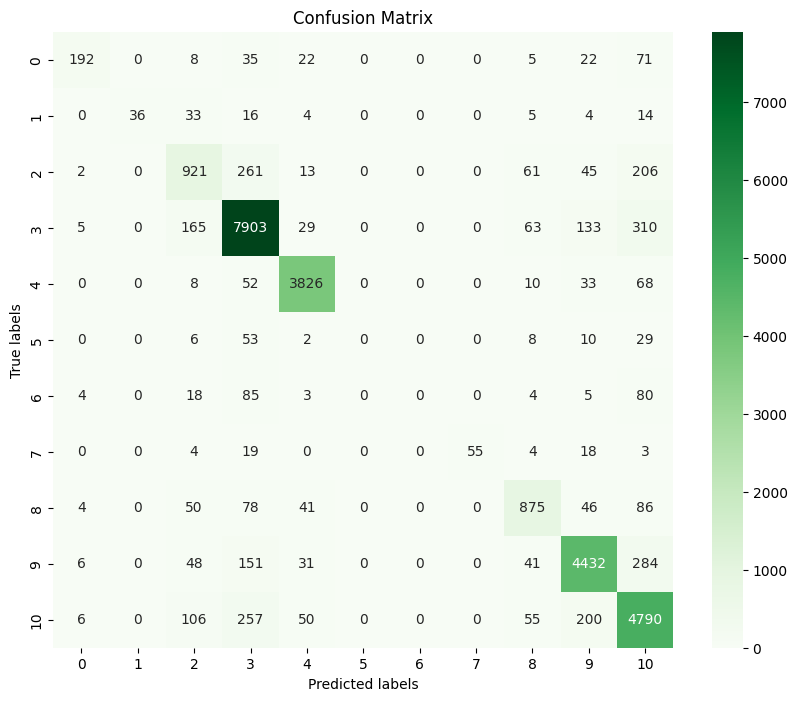

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Replace y_true and y_pred with your actual true and predicted labels
# Make sure both y_true and y_pred are 1-dimensional arrays/lists of the same length

# Calculate the confusion matrix
cm = confusion_matrix(y_test, all_predictions)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Video Confusion Matrix')
plt.show()


**CNN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA
pca = PCA(n_components=2)
X_flatten = X_train.reshape(X_train.shape[0], -1)
pca.fit(X_flatten)
X_train_pca = pca.transform(X_flatten)
X_test_pca = pca.transform(X_test.reshape(X_test.shape[0], -1))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_pca, y_train, test_size=0.2, random_state=42)

# Define a simple feedforward neural network classifier
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')  # 11 is the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_pca, y_test)
print('Test accuracy:', test_acc)


Epoch 1/20
4788/4788 [==============================] - 18s 3ms/step - loss: 1.6708 - accuracy: 0.3600 - val_loss: 1.6342 - val_accuracy: 0.3652
Epoch 2/20
4788/4788 [==============================] - 15s 3ms/step - loss: 1.6502 - accuracy: 0.3652 - val_loss: 1.6318 - val_accuracy: 0.3666
Epoch 3/20
4788/4788 [==============================] - 15s 3ms/step - loss: 1.6475 - accuracy: 0.3652 - val_loss: 1.6303 - val_accuracy: 0.3653
Epoch 4/20
4788/4788 [==============================] - 14s 3ms/step - loss: 1.6461 - accuracy: 0.3654 - val_loss: 1.6303 - val_accuracy: 0.3658
Epoch 5/20
4788/4788 [==============================] - 14s 3ms/step - loss: 1.6450 - accuracy: 0.3657 - val_loss: 1.6297 - val_accuracy: 0.3666
Epoch 6/20
4788/4788 [==============================] - 15s 3ms/step - loss: 1.6451 - accuracy: 0.3661 - val_loss: 1.6294 - val_accuracy: 0.3663
Epoch 7/20
4788/4788 [==============================] - 15s 3ms/step - loss: 1.6437 - accuracy: 0.3656 - val_loss: 1.6302 - val_ac

KeyboardInterrupt: 

In [ ]:
# Predict for X_test
predictions = model.predict(X_test)

# Assuming you want to print the predictions
print(" Predictions for X_test:")
print(predictions)

accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy)


(191512, 2048)

**Video Middle Frame**

In [ ]:
import numpy as np
import os

thirdframe_features_path = '/content/drive/MyDrive/CS670_Project/model/thirdframe_features.npy'
thirdframe_labels_path='/content/drive/MyDrive/CS670_Project/model/thirdframe_labels.npy'
X_tf = np.load(thirdframe_features_path)
y_tf=np.load(thirdframe_labels_path)

(127562, 2)


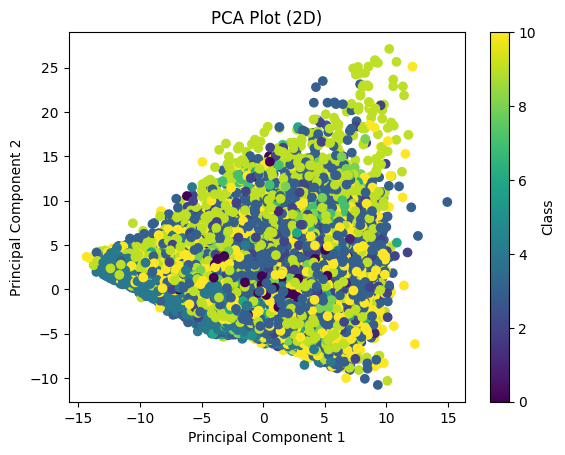

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Flatten the image data for PCA
X_flatten = X_tf.reshape(X_tf.shape[0], -1)

# Initialize PCA with the desired number of components
num_components = 2  # Adjust this as needed
pca = PCA(n_components=num_components)

# Fit PCA on the training data
pca.fit(X_flatten)

# Transform the training and testing data using the trained PCA
X_train_pca = pca.transform(X_flatten)

print(X_train_pca.shape)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_tf, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot (2D)')
plt.colorbar(label='Class')
plt.show()

In [ ]:
X_tf=X_tf.reshape(-1,2048)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

from sklearn.model_selection import train_test_split

class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out)  # Take the last time step output
        return torch.softmax(output, dim=1)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tf, y_tf, test_size=0.2, random_state=42)
# Prepare data loaders
X_train_tensor = torch.tensor(X_train)  # Features tensor
y_train_tensor = torch.tensor(y_train)
train_dataset = TensorDataset(X_train_tensor,y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Define model, loss function, and optimizer
model = LSTMClassifier(input_dim=2048, hidden_dim=128, num_layers=1, output_dim=11)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Evaluation
X_test_tensor = torch.tensor(X_test)  # Features tensor
y_test_tensor = torch.tensor(y_test)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

all_predictions = []
all_probabilities = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        probabilities = torch.softmax(outputs, dim=1)
        all_predictions.extend(predicted.tolist())
        all_probabilities.extend(probabilities.tolist())

all_predictions = torch.tensor(all_predictions)
all_probabilities = torch.tensor(all_probabilities)

print("Predicted labels for test sequences:", all_predictions)
print("Class probabilities for test sequences:", all_probabilities)

torch.save(model.state_dict(), '/content/drive/MyDrive/CS670_Project/middle_frame_lstm_model.pth')


Predicted labels for test sequences: tensor([10,  3,  9,  ..., 10,  3, 10])
Class probabilities for test sequences: tensor([[0.0786, 0.0786, 0.0786,  ..., 0.0786, 0.0786, 0.2137],
        [0.0819, 0.0819, 0.0819,  ..., 0.0819, 0.1044, 0.1089],
        [0.0790, 0.0790, 0.0790,  ..., 0.0790, 0.2075, 0.0810],
        ...,
        [0.0786, 0.0786, 0.0786,  ..., 0.0786, 0.0786, 0.2137],
        [0.0786, 0.0786, 0.0786,  ..., 0.0786, 0.0786, 0.0786],
        [0.0813, 0.0813, 0.0813,  ..., 0.0813, 0.0813, 0.1384]])


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, all_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7446007917532238
